In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from scipy.io import loadmat
import pandas as pd
from scipy.optimize import minimize

In [2]:
data = loadmat('ex4data1.mat')
theta_data = loadmat('ex4weights.mat')
X = data['X'] #5000x400
y = data['y'] #5000x1
theta1 = theta_data['Theta1'] #25x401
theta2 = theta_data['Theta2'] #10x26
y[y==10]= 0 
m = y.size
plt.rcParams['figure.figsize'] = [11, 11]

/home/hai/.local/lib/python3.6/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


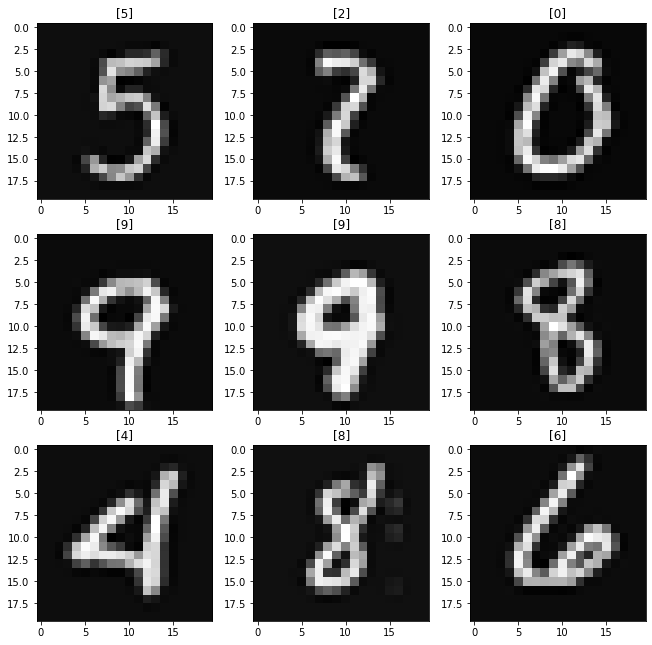

In [3]:
rand_indices = np.random.choice(m, 10, replace  = False)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.title(y[rand_indices[i]])
    plt.imshow(X[rand_indices[i]].reshape(20,20).T, cmap = 'gray')

In [4]:
def sigmoid(z):
    return (1/ (1 + np.exp(-z)))

In [5]:
def feed_forward(X, theta1, theta2):
    m = len(X)
    out = np.hstack((np.ones((m,1)),X))  #5000x401
    out =  out.dot(theta1.T)     #5000x25
    out = sigmoid(out)      #5000x25
    out = np.hstack((np.ones((m,1)),out)) #5000x26
    out = out.dot(theta2.T)    #5000x10
    out = sigmoid(out)              #5000x10
    return out       

In [6]:
out = feed_forward(X, theta1, theta2)
print(theta2.shape)
print(theta1.shape)

(10, 26)
(25, 401)


In [7]:
#y.shape = 5000x1
def loss_and_gradient(X,y,theta1 , theta2, lamda = 0):    
    y = pd.get_dummies(y.ravel()).to_numpy()
    m = len(X)
    out1 = np.hstack((np.ones((m,1)),X)) #5000x401
    out1b  = out1.dot(theta1.T) #5000x25
    a2 = sigmoid(out1b) #5000*25
    out2= np.hstack((np.ones((m,1)),a2))
    out3b = out2.dot(theta2.T)
    a3 = sigmoid(out3b)
    J = (1/m)*((y*np.log(a3)) -(1-y)*np.log(1- a3)).sum() + (lamda/2*m)*((theta1[:,1:]**2).sum()+ (theta2[:,1:]**2).sum())
    #Backpropagation 
    delta3 = a3 - y #5000x10 
    delta2 = (theta2[:,1:].T).dot(delta3.T)*a2.T*(1- a2).T  #25x5000
    
    grad_2 = 1/m * delta3.T.dot(out2)  #10x25
    grad_1 = 1/m * delta2.dot(out1) #25x401
    theta1_reg = np.c_[np.ones((theta1.shape[0],1)),theta1[:,1:]]
    theta2_reg = np.c_[np.ones((theta2.shape[0],1)),theta2[:,1:]]
    theta1_grad = grad_1/m + (theta1_reg * lamda)/m 
    theta2_grad= grad_2/m + (theta2_reg * lamda)/m
    grad = np.hstack((theta1_grad.ravel(), theta2_grad.ravel()))
    return J, theta1_grad, theta2_grad

In [8]:
#y.shape = 5000x1
def loss_and_grad(theta_params,X,y,lamda = 10000):  
    theta1 = theta_params[:10025].reshape(25,401)
    theta2 = theta_params[10025:].reshape(10,26)
    y = pd.get_dummies(y.ravel()).to_numpy()
    m = len(X)
    out1 = np.hstack((np.ones((m,1)),X)) #5000x401
    out1b  = out1.dot(theta1.T) #5000x25
    a2 = sigmoid(out1b) #5000*25
    out2= np.hstack((np.ones((m,1)),a2))
    out3b = out2.dot(theta2.T)
    a3 = sigmoid(out3b)
    J = (1/m)*(((y*np.log(a3)) -(1-y)*np.log(1- a3)).sum()) + (lamda/2*m)*((theta1[:,1:]**2).sum()+ (theta2[:,1:]**2).sum())
     #Backpropagation 
    delta3 = a3 - y #5000x10 
    delta2 = (theta2[:,1:].T).dot(delta3.T)*a2.T*(1- a2).T  #25x5000
    
    grad_2 = 1/m * delta3.T.dot(out2)  #10x25
    grad_1 = 1/m * delta2.dot(out1) #25x401
    theta1_reg = np.c_[np.ones((theta1.shape[0],1)),theta1[:,1:]]
    theta2_reg = np.c_[np.ones((theta2.shape[0],1)),theta2[:,1:]]
    theta1_grad = grad_1/m + (theta1_reg * lamda)/m 
    theta2_grad= grad_2/m + (theta2_reg * lamda)/m
    grad = np.hstack((theta1_grad.ravel(), theta2_grad.ravel()))
    return J, grad

In [9]:
def predict(X, theta1, theta2):
    out = feed_forward(X, theta1, theta2)
    return np.argmax(out, axis = 1)

In [24]:
theta_params = np.hstack((theta1.ravel(), theta2.ravel()))
# loss, grad1, grad2 = loss_and_gradient(X,y, theta1, theta2)
loss, grad = loss_and_grad(theta_params , X, y, lamda = 0)
print(loss)

-3.5038891869101465


In [11]:
# #Trainning 
# theta1 = np.random.rand(25, 401)
# theta2 = np.random.rand(10, 26)
# i = 0
# lr = 0.1
# while True:
#     loss, grad1, grad2 = loss_and_gradient(X ,y, theta1, theta2)
    
#     theta1 -= lr * grad1
#     theta2 -= lr * grad2
#     pred = predict(X, theta1, theta2)
#     acc = np.mean(pred == (y.ravel()))
    
    
#     if i % 100 == 0:
#         print('Iter: {}, loss: {:.4f}'.format(i, loss))
#         print('Acc: ', acc)
#     i += 1
#     if i == 10000:
#         break

In [12]:
theta1_0 = np.random.rand(25,401)
theta2_0 = np.random.rand(10,26)
theta_0 = np.hstack((theta1_0.ravel(), theta2_0.ravel()))
nn = minimize( fun = loss_and_grad, x0 = theta_0, 
              args = (X, y, 1), 
              method = 'CG', jac = True, options = {'maxiter' : 400} )

/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning

/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning

/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning

/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning

/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning

/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning

/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning

/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning

/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning

/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning

/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning

/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning

/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning

/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning

/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning

/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning

/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning

/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/hai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning

In [13]:
print(nn)

     fun: -76.37799099683293
     jac: array([2.00000000e-04, 1.97912062e-46, 2.86652776e-46, ...,
       1.16896409e-40, 1.18836085e-40, 6.90438618e-41])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 31339
     nit: 400
    njev: 31339
  status: 1
 success: False
       x: array([-8.40309361e+01,  9.89560308e-43,  1.43326388e-42, ...,
        6.46377704e-37,  6.57103088e-37,  3.81776953e-37])


In [19]:
prec = predict(X, nn.x[:25*401].reshape(25,401), nn.x[25*401:].reshape(10,26))

In [23]:
print(prec)
acc = np.mean(prec == y.ravel())*100
print (acc)

[2 2 2 ... 2 2 2]
10.0
